In [105]:
def Graficas(hist):
  plt.title = "Función de Perdidas (Entrenamiento vs Validación)"
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.xlabel('No Epocas')
  plt.legend(['Entrenamiento', 'Validación'])
  plt.show()

  plt.title = "Métricas (Entrenamiento vs Validación)"
  plt.plot(hist.history['categorical_accuracy'])
  plt.plot(hist.history['val_categorical_accuracy'])
  plt.xlabel('No Epocas')
  plt.legend(['Entrenamiento', 'Validación'])
  plt.show()

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import random

def Evaluar_Predecir(modelo, x_data, y_data, tam):
  (validation_perdidas, validation_metricas) = modelo.evaluate(x_data, y_data, batch_size = tam)
  print("Evaluación: Perdidas [{}] Métricas [{}]".format(validation_perdidas, validation_metricas))
  y_pred = modelo.predict(x_data, batch_size = tam)


  y_real = np.argmax(y_data, axis = 1)
  y_pre = np.argmax(y_pred, axis = 1)

  res = confusion_matrix(y_real, y_pre)
  plt.imshow(res, cmap = plt.cm.Blues)

  exactitud = accuracy_score(y_real, y_pre)

  print("Exactitud [{}]". format(exactitud))

  precision = precision_score(y_real, y_pre, average = 'macro')

  print("Precision [{}]". format(precision))

# Proyecto: Redes Neuronales Convolucionales


## Enunciado

En esta actividad, los alumnos deben **diseñar y evaluar varios modelos de clasificación de imagenes** empleando el **dataset asignado**. El grupo de alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga la metodologia propuesta en clases para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos

5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

La estrategia será una **red neuronal profunda** que los grupos **deben diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que se utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo en grupos de 3 estudiantes**.
- Se debe entregar un **ÚNICO FICHERO PDF POR GRUPO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla UN SOLO integrante del grupo** en la actividad que se habilitará **TEAMS**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Ejemplo de carga de datos desde un directorio

In [107]:
%pip install matplotlib
%pip install opencv-python
%pip install tensorflow
%pip install scikit-learn
%pip install keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srJ_5\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srJ_5\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\srJ_5\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srJ_5\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\srJ_5\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [108]:
BASE_FOLDER = "C:/Users/srJ_5/OneDrive/Documentos/UNIVERSIDAD/9no semestre/TALLER 2/Reconocimiento de cicatricez/tallerScars/archive"


## Ejemplo de escritura de datos tomando como referencia un BASE_FOLDER

In [109]:
# Number of samples we will have in each class.
SAMPLE_SIZE = 319

# The images will all be resized to this size.
IMAGE_SIZE = 126

In [110]:
import shutil
import os
train_dir=BASE_FOLDER+"/train"
val_dir=BASE_FOLDER+"/val"


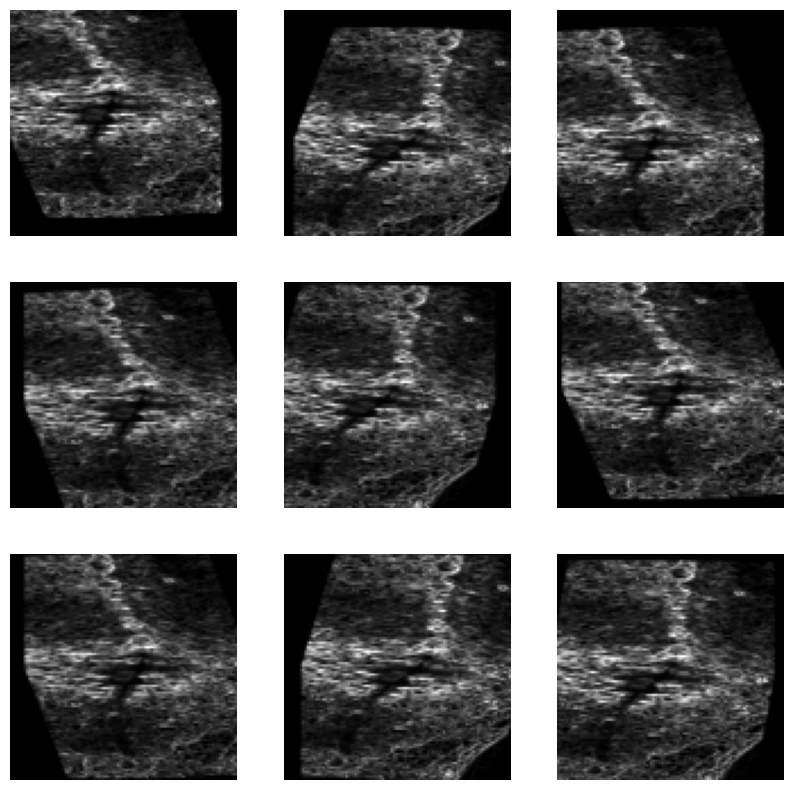

In [111]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.ndimage import filters

rotation_angle = 10
shift_range = 0.1
zoom_range = 0.1
brightness_range = (0.5, 2.0)

train_dir=BASE_FOLDER+"/train"
val_dir=BASE_FOLDER+"/val"
test_dir=BASE_FOLDER+"/test"
kernel_size = 5
dim=[100,100]
x_train=[]
def augment_image(image):
    # Rotación
    angle = np.random.uniform(-rotation_angle, rotation_angle)
    rows, cols = image.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))

    # Desplazamiento
    dx = np.random.uniform(-shift_range * cols, shift_range * cols)
    dy = np.random.uniform(-shift_range * rows, shift_range * rows)
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    shifted_image = cv2.warpAffine(rotated_image, M, (cols, rows))

    # Zoom
    zoom_factor = 1 + np.random.uniform(-zoom_range, zoom_range)
    resized_image = cv2.resize(shifted_image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

    # Ajuste de brillo y contraste
    brightness_factor = np.random.uniform(brightness_range[0], brightness_range[1])
    brightened_image = cv2.convertScaleAbs(resized_image, alpha=brightness_factor, beta=0)
    resized=cv2.resize(brightened_image,(100,100),interpolation = cv2.INTER_AREA)
    return resized

# Iterar sobre las imágenes en el directorio de entrenamiento y aplicar aumento de datos
for i in os.listdir(train_dir):
    for j in os.listdir(os.path.join(train_dir, i)):
        image = cv2.imread(os.path.join(train_dir, i, j), cv2.IMREAD_GRAYSCALE)
        # Aplicar aumento de datos y agregar la imagen aumentada al conjunto de entrenamiento
        for _ in range(10):  # Ajusta num_augmentations_per_image según tu necesidad
            image=cv2.equalizeHist(image)
            imagen_suavizada = cv2.medianBlur(image, 5)

# Paso 2: Aclarar zonas oscuras (aumentar el contraste)
# No necesitamos aplicar ecualización de histograma si ya estamos en escala de grises

# Paso 3: Aplicar el operador Sobel para detección de bordes
            sobelx = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 1, 0, ksize=5)
            sobely = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 0, 1, ksize=5)
            gradiente_magnitud = np.sqrt(sobelx**2 + sobely**2)
            gradiente_magnitud = cv2.normalize(gradiente_magnitud, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            augmented_image = augment_image(gradiente_magnitud)
           

            x_train.append(augmented_image)
num_images = 9
plt.figure(figsize=(10, 10))  # Tamaño del gráfico

for i in range(num_images):
    plt.subplot(3, 3, i + 1)  # 3 filas, 3 columnas, posición i+1
    plt.imshow(x_train[i+10], cmap='gray')  # Mostrar imagen en escala de grises
    plt.axis('off')  # Apagar ejes

plt.show()


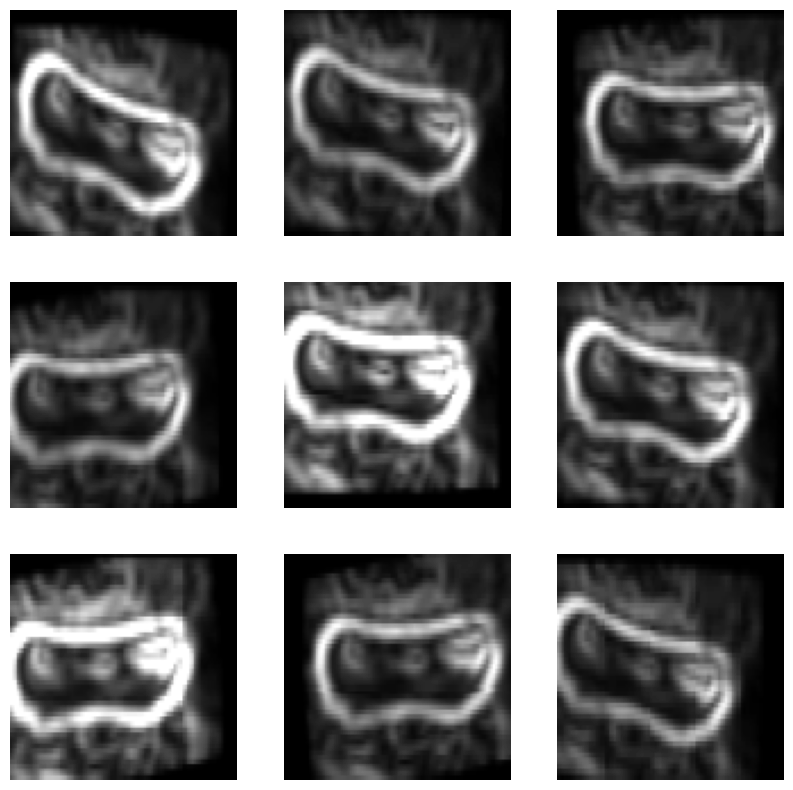

In [112]:
x_val=[]
for i in os.listdir(val_dir):
    for j in os.listdir(os.path.join(val_dir, i)):
        image = cv2.imread(os.path.join(val_dir, i, j), cv2.IMREAD_GRAYSCALE)

        # Aplicar aumento de datos y agregar la imagen aumentada al conjunto de entrenamiento
        for _ in range(10):  # Ajusta num_augmentations_per_image según tu necesidad
            image=cv2.equalizeHist(image)

            imagen_suavizada = cv2.GaussianBlur(image, (3, 3), 0)

# Paso 2: Aclarar zonas oscuras (aumentar el contraste)
# No necesitamos aplicar ecualización de histograma si ya estamos en escala de grises

# Paso 3: Aplicar el operador Sobel para detección de bordes
            sobelx = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 1, 0, ksize=5)
            sobely = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 0, 1, ksize=5)
            gradiente_magnitud = np.sqrt(sobelx**2 + sobely**2)
            gradiente_magnitud = cv2.normalize(gradiente_magnitud, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            augmented_image = augment_image(gradiente_magnitud)
            x_val.append(augmented_image)
num_images = 9
plt.figure(figsize=(10, 10))  # Tamaño del gráfico

for i in range(num_images):
    plt.subplot(3, 3, i + 1)  # 3 filas, 3 columnas, posición i+1
    plt.imshow(x_val[i+10], cmap='gray')  # Mostrar imagen en escala de grises
    plt.axis('off')  # Apagar ejes

In [113]:
x_test=[]
for i in os.listdir(test_dir):
    for j in os.listdir(os.path.join(test_dir, i)):
        image = cv2.imread(os.path.join(test_dir, i, j), cv2.IMREAD_GRAYSCALE)

        # Aplicar aumento de datos y agregar la imagen aumentada al conjunto de entrenamiento
        for _ in range(10):  # Ajusta num_augmentations_per_image según tu necesidad
            image=cv2.equalizeHist(image)

            imagen_suavizada = cv2.GaussianBlur(image, (3, 3), 0)

# Paso 2: Aclarar zonas oscuras (aumentar el contraste)
# No necesitamos aplicar ecualización de histograma si ya estamos en escala de grises

# Paso 3: Aplicar el operador Sobel para detección de bordes
            sobelx = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 1, 0, ksize=5)
            sobely = cv2.Sobel(imagen_suavizada, cv2.CV_64F, 0, 1, ksize=5)
            gradiente_magnitud = np.sqrt(sobelx**2 + sobely**2)
            gradiente_magnitud = cv2.normalize(gradiente_magnitud, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            augmented_image = augment_image(gradiente_magnitud)

            x_test.append(augmented_image)
    #print(j)

In [114]:
x_train=np.array(x_train)
x_val=np.array(x_val)
x_test=np.array(x_test)

In [115]:
print(x_train.dtype)
print(x_train.shape)

uint8
(6380, 100, 100)


In [116]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val=x_val.astype("float32")

In [117]:
x_train = x_train/255
x_val = x_val/255
x_test=x_test/255


In [118]:
x_val[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09803922, 0.07843138,
        0.07058824],
       [0.        , 0.        , 0.        , ..., 0.08627451, 0.0627451 ,
        0.05490196],
       [0.        , 0.        , 0.        , ..., 0.07058824, 0.05098039,
        0.04313726]], dtype=float32)

CREAMOS LAS CATERGORIAS

In [119]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical([0,1], 2)

y_train_new=[]
for i in y_train:
  for j in range(319*10):
    y_train_new.append(i)
y_train=np.array(y_train_new)


In [120]:
y_val = tf.keras.utils.to_categorical([0,1], 2)

y_val_new=[]
for i in y_val:
  for j in range(126*10):
    y_val_new.append(i)
y_val=np.array(y_val_new)

In [121]:
y_test = tf.keras.utils.to_categorical([0,1], 2)

y_test_new=[]
for i in y_test:
  for j in range(14*10):
    y_test_new.append(i)
y_test=np.array(y_test_new)

In [122]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D

model = Sequential()

# Extracción de características
model.add(Flatten(input_shape = (100, 100, 1), name = "Entrada"))
model.add(Dense(256, activation="relu", kernel_initializer= 'glorot_uniform', bias_initializer= 'glorot_uniform', name = "Oculta_No_1"))
model.add(Dense(128, activation="relu", name = "Oculta_No_2"))
model.add(Dense(64, activation="relu", name = "Oculta_No_3"))
model.add(Dense(32, activation="relu", name = "Oculta_No_4"))
model.add(Dense(2, activation="sigmoid", name = "Salida"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Entrada (Flatten)           (None, 10000)             0         
                                                                 
 Oculta_No_1 (Dense)         (None, 256)               2560256   
                                                                 
 Oculta_No_2 (Dense)         (None, 128)               32896     
                                                                 
 Oculta_No_3 (Dense)         (None, 64)                8256      
                                                                 
 Oculta_No_4 (Dense)         (None, 32)                2080      
                                                                 
 Salida (Dense)              (None, 2)                 66        
                                                                 
Total params: 2603554 (9.93 MB)
Trainable params: 2603

In [123]:
model.compile(optimizer='Adam', loss='CategoricalCrossentropy', metrics='CategoricalAccuracy')

In [124]:


# Print dataset sizes
print("Training data size:", len(x_train))
print("Training data size:", len(y_train))

print("Validation data size:", len(x_val))

print("Validation data size:", len(y_val))

Training data size: 6380
Training data size: 6380
Validation data size: 2520
Validation data size: 2520


In [125]:
import tensorflow as tf


callBack_ES = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)

checkpoint_filepath = 'C:/tmp/checkpoints/checkpoint_temp'
callBack_Pesos = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, save_weights_only=True, monitor = 'val_categorical_accuracy', mode = 'max', save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val), callbacks = [callBack_ES, callBack_Pesos])

Epoch 1/100
100/100 [==============================] - 4s 24ms/step - loss: 0.7178 - categorical_accuracy: 0.5260 - val_loss: 0.7031 - val_categorical_accuracy: 0.5194
Epoch 2/100
100/100 [==============================] - 2s 21ms/step - loss: 0.6765 - categorical_accuracy: 0.5749 - val_loss: 0.7043 - val_categorical_accuracy: 0.5143
Epoch 3/100
100/100 [==============================] - 2s 22ms/step - loss: 0.6673 - categorical_accuracy: 0.5961 - val_loss: 0.7017 - val_categorical_accuracy: 0.5278
Epoch 4/100
100/100 [==============================] - 2s 21ms/step - loss: 0.6626 - categorical_accuracy: 0.6056 - val_loss: 0.7058 - val_categorical_accuracy: 0.5385
Epoch 5/100
100/100 [==============================] - 2s 20ms/step - loss: 0.6539 - categorical_accuracy: 0.6127 - val_loss: 0.7413 - val_categorical_accuracy: 0.5171
Epoch 6/100
100/100 [==============================] - 2s 21ms/step - loss: 0.6574 - categorical_accuracy: 0.6045 - val_loss: 0.6945 - val_categorical_accuracy:

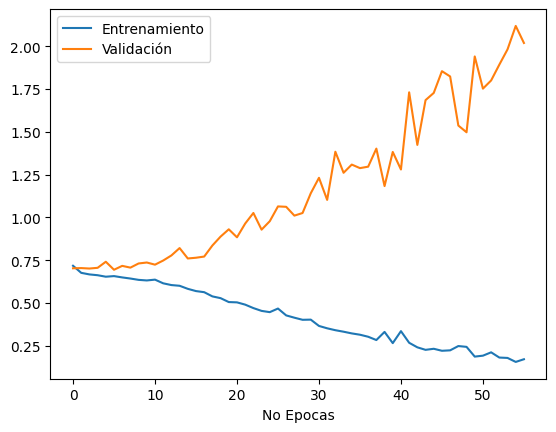

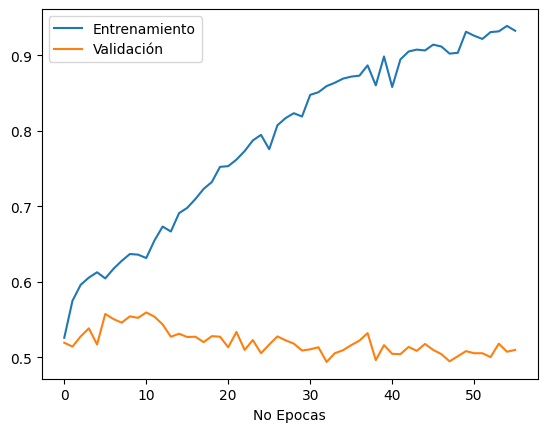

In [126]:
Graficas(hist)

5/5 [==============================] - 0s 4ms/step - loss: 1.4278 - categorical_accuracy: 0.5929
Evaluación: Perdidas [1.4277753829956055] Métricas [0.5928571224212646]
5/5 [==============================] - 0s 4ms/step
Exactitud [0.5928571428571429]
Precision [0.5994318181818181]


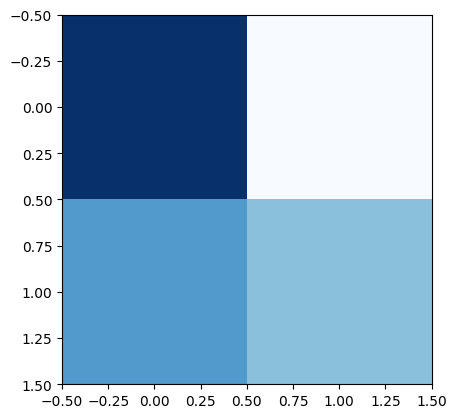

In [127]:
Evaluar_Predecir(model, x_test, y_test, 64)

MODELO 2

In [128]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout

model_conv = Sequential()

# Extracción de características
model_conv.add(Input(shape = (100, 100, 1), name = "Entrada"))

# Bloque Convolucional No 1
model_conv.add(Conv2D(filters=10, kernel_size=5, strides=(2, 2), padding='valid', activation='relu', name="Conv_No_1"))
model_conv.add(MaxPooling2D(pool_size=(4, 4), name='MaxPool_No_1'))

# Clasificación
model_conv.add(Flatten(name="Flatten"))
model_conv.add(Dense(512, activation="relu", name="Clasificacion"))
model_conv.add(Dense(2, activation="sigmoid", name="Salida"))
model_conv.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_No_1 (Conv2D)          (None, 48, 48, 10)        260       
                                                                 
 MaxPool_No_1 (MaxPooling2D  (None, 12, 12, 10)        0         
 )                                                               
                                                                 
 Flatten (Flatten)           (None, 1440)              0         
                                                                 
 Clasificacion (Dense)       (None, 512)               737792    
                                                                 
 Salida (Dense)              (None, 2)                 1026      
                                                                 
Total params: 739078 (2.82 MB)
Trainable params: 739078 (2.82 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [129]:
model_conv.compile(optimizer='SGD', loss='CategoricalCrossentropy', metrics='CategoricalAccuracy')

In [130]:
callBack_ES = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)

checkpoint_filepath = 'C:/tmp/checkpoints/checkpoint_temp'

callBack_Pesos = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, save_weights_only=True, monitor = 'val_categorical_accuracy', mode = 'max', save_best_only=True)

# hist_conv = model_conv.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val), callbacks = [callBack_ES, callBack_Pesos])

hist_conv = model_conv.fit(x_train, y_train, batch_size = 64, epochs=100, validation_data=(x_val, y_val), callbacks = [callBack_ES, callBack_Pesos])

Epoch 1/100
100/100 [==============================] - 2s 13ms/step - loss: 0.6880 - categorical_accuracy: 0.5464 - val_loss: 0.6914 - val_categorical_accuracy: 0.5190
Epoch 2/100
100/100 [==============================] - 1s 10ms/step - loss: 0.6782 - categorical_accuracy: 0.5820 - val_loss: 0.6843 - val_categorical_accuracy: 0.5607
Epoch 3/100
100/100 [==============================] - 1s 10ms/step - loss: 0.6687 - categorical_accuracy: 0.5908 - val_loss: 0.6810 - val_categorical_accuracy: 0.5671
Epoch 4/100
100/100 [==============================] - 1s 10ms/step - loss: 0.6628 - categorical_accuracy: 0.5992 - val_loss: 0.6840 - val_categorical_accuracy: 0.5663
Epoch 5/100
100/100 [==============================] - 1s 11ms/step - loss: 0.6581 - categorical_accuracy: 0.6091 - val_loss: 0.6935 - val_categorical_accuracy: 0.5690
Epoch 6/100
100/100 [==============================] - 1s 10ms/step - loss: 0.6558 - categorical_accuracy: 0.6060 - val_loss: 0.6917 - val_categorical_accuracy:

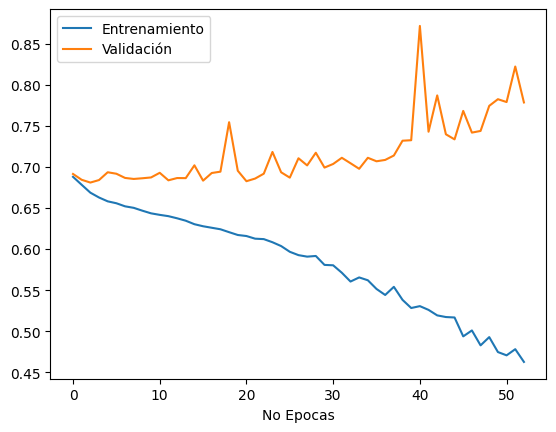

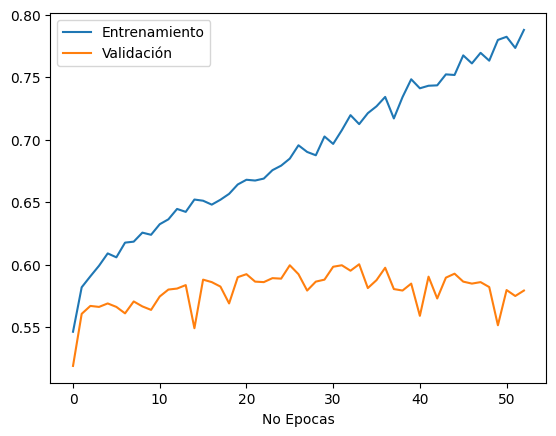

In [131]:
Graficas(hist_conv)

5/5 [==============================] - 0s 5ms/step - loss: 0.5379 - categorical_accuracy: 0.7714
Evaluación: Perdidas [0.5379279851913452] Métricas [0.7714285850524902]
5/5 [==============================] - 0s 3ms/step
Exactitud [0.7714285714285715]
Precision [0.7811244979919678]


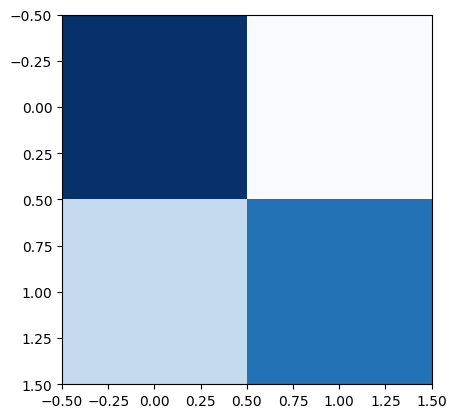

In [132]:
Evaluar_Predecir(model_conv, x_test, y_test, 64)

In [133]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout

model_conv = Sequential()

# Extracción de características
model_conv.add(Input(shape = (100, 100, 1), name = "Entrada"))

# Bloque Convolucional No 1
model_conv.add(Conv2D(filters = 20, kernel_size = 4, strides = (3,3), padding = 'valid', name = "Conv_No_1"))
model_conv.add(MaxPooling2D(pool_size = (4,4), name = 'MaxPool_No_1'))

# Clasificación
model_conv.add(Flatten(input_shape = (3,3,10), name = "Entrada_clasif"))
model_conv.add(Dense(512, activation="relu", name = "Clasificacion"))
model_conv.add(Dense(2, activation="sigmoid", name = "Salida"))
model_conv.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_No_1 (Conv2D)          (None, 33, 33, 20)        340       
                                                                 
 MaxPool_No_1 (MaxPooling2D  (None, 8, 8, 20)          0         
 )                                                               
                                                                 
 Entrada_clasif (Flatten)    (None, 1280)              0         
                                                                 
 Clasificacion (Dense)       (None, 512)               655872    
                                                                 
 Salida (Dense)              (None, 2)                 1026      
                                                                 
Total params: 657238 (2.51 MB)
Trainable params: 657238 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [134]:
model_conv.compile(optimizer='Adam', loss='CategoricalCrossentropy', metrics='CategoricalAccuracy')

In [135]:
callBack_ES = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)

checkpoint_filepath = 'C:/tmp/checkpoints/checkpoint_temp'

callBack_Pesos = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, save_weights_only=True, monitor = 'val_categorical_accuracy', mode = 'max', save_best_only=True)

# hist_conv = model_conv.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val), callbacks = [callBack_ES, callBack_Pesos])

hist_conv = model_conv.fit(x_train, y_train, batch_size = 64, epochs=100, validation_data=(x_val, y_val), callbacks = [callBack_ES, callBack_Pesos])

Epoch 1/100
100/100 [==============================] - 2s 13ms/step - loss: 0.6577 - categorical_accuracy: 0.6122 - val_loss: 0.6445 - val_categorical_accuracy: 0.6341
Epoch 2/100
100/100 [==============================] - 1s 10ms/step - loss: 0.6018 - categorical_accuracy: 0.6765 - val_loss: 0.6700 - val_categorical_accuracy: 0.6083
Epoch 3/100
100/100 [==============================] - 1s 11ms/step - loss: 0.5514 - categorical_accuracy: 0.7201 - val_loss: 0.7087 - val_categorical_accuracy: 0.5948
Epoch 4/100
100/100 [==============================] - 1s 11ms/step - loss: 0.4805 - categorical_accuracy: 0.7737 - val_loss: 0.7321 - val_categorical_accuracy: 0.5940
Epoch 5/100
100/100 [==============================] - 1s 11ms/step - loss: 0.4144 - categorical_accuracy: 0.8169 - val_loss: 0.8128 - val_categorical_accuracy: 0.5639
Epoch 6/100
100/100 [==============================] - 1s 11ms/step - loss: 0.3291 - categorical_accuracy: 0.8718 - val_loss: 0.8607 - val_categorical_accuracy:

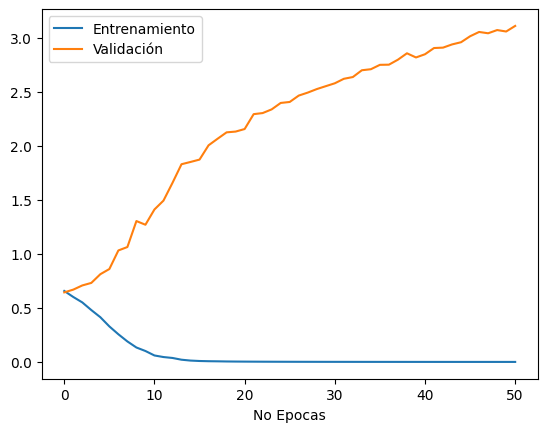

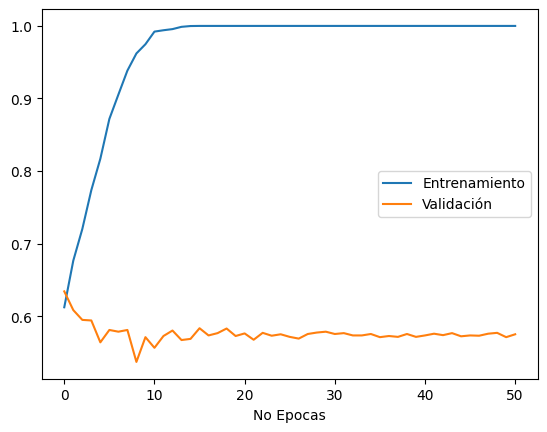

In [136]:
Graficas(hist_conv)

5/5 [==============================] - 0s 3ms/step - loss: 2.5952 - categorical_accuracy: 0.6107
Evaluación: Perdidas [2.595184564590454] Métricas [0.6107142567634583]
5/5 [==============================] - 0s 3ms/step
Exactitud [0.6107142857142858]
Precision [0.6276545679157597]


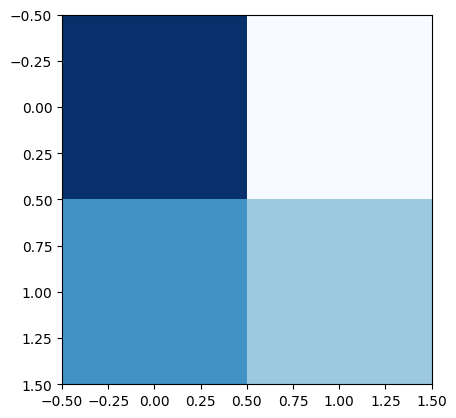

In [137]:
Evaluar_Predecir(model_conv, x_test, y_test, 64)

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Crear el modelo
model_conv = Sequential()

# Extracción de características
model_conv.add(Input(shape=(100, 100, 1), name="Entrada"))

# Bloque Convolucional No 1
model_conv.add(Conv2D(filters=20, kernel_size=4, strides=(3, 3), padding='valid', name="Conv_No_1"))
model_conv.add(MaxPooling2D(pool_size=(4, 4), name='MaxPool_No_1'))

# Bloque 2
model_conv.add(Conv2D(filters=10, kernel_size=2, strides=(2, 2), padding='valid', name="Conv_No_2"))
model_conv.add(MaxPooling2D(pool_size=(3, 3), name='MaxPool_No_2'))

# Clasificación
model_conv.add(Flatten(name="Flatten"))
model_conv.add(Dense(512, activation="relu", name="Clasificacion"))
model_conv.add(Dense(256, activation="relu", name="Clasificacion2"))
model_conv.add(Dense(128, activation="relu", name="Clasificacion3"))
model_conv.add(Dense(2, activation="sigmoid", name="Salida"))

# Mostrar resumen del modelo
model_conv.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_No_1 (Conv2D)          (None, 33, 33, 20)        340       
                                                                 
 MaxPool_No_1 (MaxPooling2D  (None, 8, 8, 20)          0         
 )                                                               
                                                                 
 Conv_No_2 (Conv2D)          (None, 4, 4, 10)          810       
                                                                 
 MaxPool_No_2 (MaxPooling2D  (None, 1, 1, 10)          0         
 )                                                               
                                                                 
 Flatten (Flatten)           (None, 10)                0         
                                                                 
 Clasificacion (Dense)       (None, 512)             

In [139]:
model_conv.compile(optimizer='RMSprop', loss='CategoricalCrossentropy', metrics='CategoricalAccuracy')

In [140]:
callBack_ES = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)

checkpoint_filepath = 'C:/tmp/checkpoints/checkpoint_temp'

callBack_Pesos = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath, save_weights_only=True, monitor = 'val_categorical_accuracy', mode = 'max', save_best_only=True)

# hist_conv = model_conv.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val), callbacks = [callBack_ES, callBack_Pesos])

hist_conv = model_conv.fit(x_train, y_train, batch_size = 64, epochs=100, validation_data=(x_val, y_val), callbacks = [callBack_ES, callBack_Pesos])

Epoch 1/100
100/100 [==============================] - 2s 11ms/step - loss: 0.6804 - categorical_accuracy: 0.5578 - val_loss: 0.6601 - val_categorical_accuracy: 0.6159
Epoch 2/100
100/100 [==============================] - 1s 9ms/step - loss: 0.6666 - categorical_accuracy: 0.5876 - val_loss: 0.6508 - val_categorical_accuracy: 0.6448
Epoch 3/100
100/100 [==============================] - 1s 9ms/step - loss: 0.6578 - categorical_accuracy: 0.6097 - val_loss: 0.6411 - val_categorical_accuracy: 0.6484
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.6514 - categorical_accuracy: 0.6187 - val_loss: 0.6600 - val_categorical_accuracy: 0.6183
Epoch 5/100
100/100 [==============================] - 1s 8ms/step - loss: 0.6473 - categorical_accuracy: 0.6230 - val_loss: 0.6453 - val_categorical_accuracy: 0.6437
Epoch 6/100
100/100 [==============================] - 1s 8ms/step - loss: 0.6405 - categorical_accuracy: 0.6362 - val_loss: 0.6798 - val_categorical_accuracy: 0.59

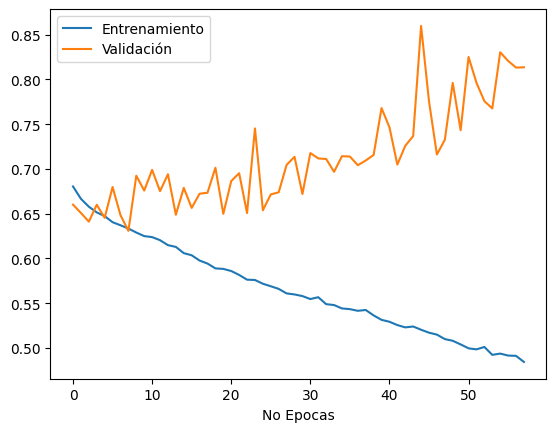

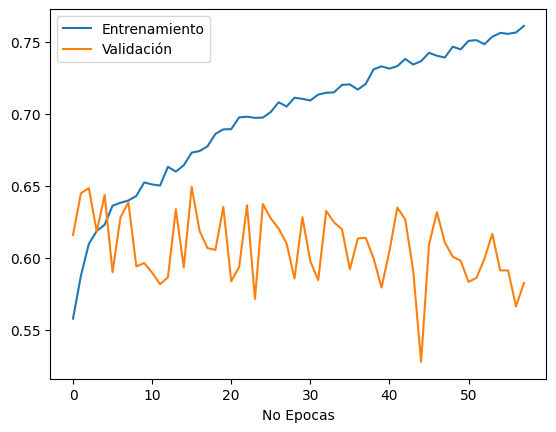

In [141]:
Graficas(hist_conv)

5/5 [==============================] - 0s 4ms/step - loss: 0.7132 - categorical_accuracy: 0.6500
Evaluación: Perdidas [0.7132466435432434] Métricas [0.6499999761581421]
5/5 [==============================] - 0s 641us/step
Exactitud [0.65]
Precision [0.7409046214355949]


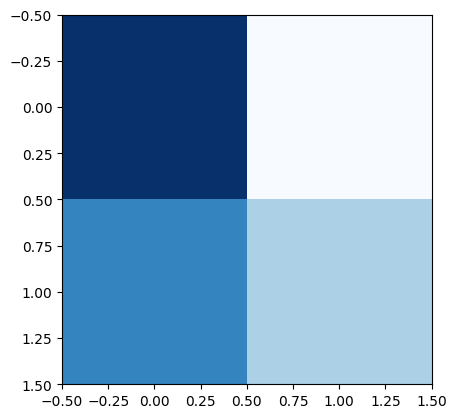

In [142]:
Evaluar_Predecir(model_conv, x_test, y_test, 64)